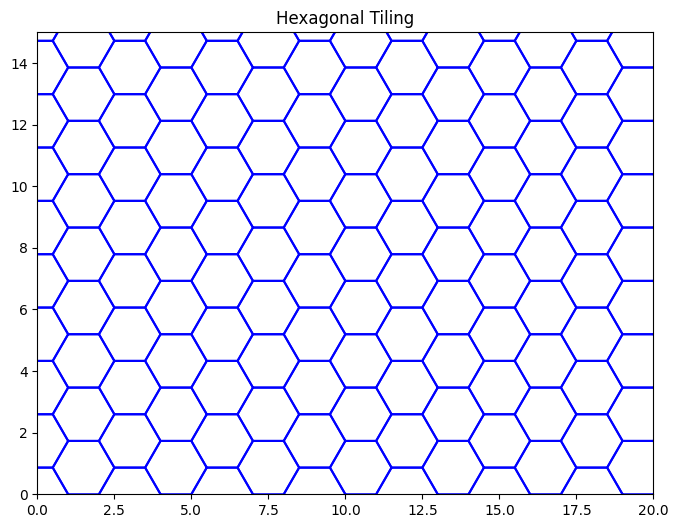

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def hexagon(center_x, center_y, size):
    """
    Generate the coordinates of a hexagon centered at (center_x, center_y) with a given size.
    """
    angles = np.linspace(0, 2 * np.pi, 7)  # 6 points + closure point
    x = center_x + size * np.cos(angles)
    y = center_y + size * np.sin(angles)
    return x, y

def hexagonal_tiling(surface_width, surface_height, hex_size):
    """
    Create a hexagonal tiling for a surface.
    :param surface_width: Width of the surface
    :param surface_height: Height of the surface
    :param hex_size: Size of each hexagon (distance from center to vertex)
    """
    # Hexagon geometry
    dx = 3/2 * hex_size  # Horizontal distance between centers
    dy = np.sqrt(3) * hex_size  # Vertical distance between centers
    
    # Tiling loop
    hex_centers = []
    for row in range(int(surface_height / dy) + 2):
        for col in range(int(surface_width / dx) + 2):
            # Offset every other row to create a staggered effect
            center_x = col * dx
            center_y = row * dy + (hex_size * np.sqrt(3) / 2 if col % 2 else 0)
            
            # Only include hexagons fully inside the surface
            if center_x - hex_size < surface_width and center_y - hex_size < surface_height:
                hex_centers.append((center_x, center_y))
    
    return hex_centers

def draw_hexagonal_tiling(surface_width, surface_height, hex_size):
    """
    Draw a hexagonal tiling on a specified surface.
    """
    hex_centers = hexagonal_tiling(surface_width, surface_height, hex_size)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_aspect('equal')

    # Draw hexagons
    for center_x, center_y in hex_centers:
        x, y = hexagon(center_x, center_y, hex_size)
        ax.plot(x, y, 'b')  # Draw hexagon edges

    # Set limits
    ax.set_xlim(0, surface_width)
    ax.set_ylim(0, surface_height)
    ax.set_title("Hexagonal Tiling")
    plt.show()

# Parameters
surface_width = 20
surface_height = 15
hex_size = 1

# Draw the hexagonal tiling
draw_hexagonal_tiling(surface_width, surface_height, hex_size)